In [8]:
!pip install ultralytics
!pip install numpy
!pip install pillow
!pip install requests
!pip install OpenCV
!pip install matplotlib

ERROR: Could not find a version that satisfies the requirement OpenCV (from versions: none)
ERROR: No matching distribution found for OpenCV


In [11]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import cv2
from matplotlib import pyplot as plt
import glob

Maintenant, on peut charger une version de YOLOv8 pré-entraîné (par défaut ultralytics nous donne la plus récente) :

In [10]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 83.1MB/s]


Récupération d'images aléatoire avec qwant.
Remplace l'exemple initial de la box commentée.

Ensuite, on peut charger une image depuis internet et la transformer en array numpy :

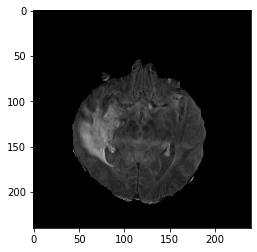

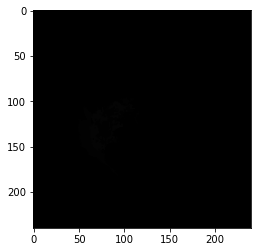

In [37]:
data_img = glob.glob("./BRATS/images/*.png")
data_seg = glob.glob("./BRATS/labels/*.png")

if len(data_img)!=len(data_seg):
    print("ERROR: data not same length")
    exit(1)
else:
    for i in range(len(data_img)):
        img = cv2.imread(data_img[i])
        data_img[i] = np.asarray(img)
        seg = cv2.imread(data_seg[i])
        data_seg[i] = np.asarray(seg)
                   
#imageOr = Image.open(BytesIO(response.content))

plt.imshow(data_img[0])
plt.show()
plt.imshow(data_seg[0])
plt.show()

image = data_img[0]

Puis, on lance la prédiction sur notre image (cela devrait être rapide, même sans GPU) :

In [38]:
print(image.shape)

(240, 240, 3)


In [39]:
results = model.predict(image)


0: 640x640 1 vase, 5.3ms
Speed: 4.0ms preprocess, 5.3ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


In [43]:
print(results[0].boxes.data)

tensor([[ 42.3189,  53.6749, 190.3005, 214.5415,   0.3222,  75.0000]], device='cuda:0')


Affichage des Bounding box

In [44]:
def box_label(image, box, label='', color=(128, 128, 128), txt_color=(255, 255, 255)):
  lw = max(round(sum(image.shape) / 2 * 0.003), 2)
  p1, p2 = (int(box[0]), int(box[1])), (int(box[2]), int(box[3]))
  cv2.rectangle(image, p1, p2, color, thickness=lw, lineType=cv2.LINE_AA)
  if label:
    tf = max(lw - 1, 1)  # font thickness
    w, h = cv2.getTextSize(label, 0, fontScale=lw / 3, thickness=tf)[0]  # text width, height
    outside = p1[1] - h >= 3
    p2 = p1[0] + w, p1[1] - h - 3 if outside else p1[1] + h + 3
    cv2.rectangle(image, p1, p2, color, -1, cv2.LINE_AA)  # filled
    cv2.putText(image,
                label, (p1[0], p1[1] - 2 if outside else p1[1] + h + 2),
                0,
                lw / 3,
                txt_color,
                thickness=tf,
                lineType=cv2.LINE_AA)

def plot_bboxes(image, boxes, labels=[], colors=[], score=True, conf=None):
  #Define COCO Labels
  if labels == []:
    labels = {0: u'__background__', 1: u'person', 2: u'bicycle',3: u'car', 4: u'motorcycle', 5: u'airplane', 6: u'bus', 7: u'train', 8: u'truck', 9: u'boat', 10: u'traffic light', 11: u'fire hydrant', 12: u'stop sign', 13: u'parking meter', 14: u'bench', 15: u'bird', 16: u'cat', 17: u'dog', 18: u'horse', 19: u'sheep', 20: u'cow', 21: u'elephant', 22: u'bear', 23: u'zebra', 24: u'giraffe', 25: u'backpack', 26: u'umbrella', 27: u'handbag', 28: u'tie', 29: u'suitcase', 30: u'frisbee', 31: u'skis', 32: u'snowboard', 33: u'sports ball', 34: u'kite', 35: u'baseball bat', 36: u'baseball glove', 37: u'skateboard', 38: u'surfboard', 39: u'tennis racket', 40: u'bottle', 41: u'wine glass', 42: u'cup', 43: u'fork', 44: u'knife', 45: u'spoon', 46: u'bowl', 47: u'banana', 48: u'apple', 49: u'sandwich', 50: u'orange', 51: u'broccoli', 52: u'carrot', 53: u'hot dog', 54: u'pizza', 55: u'donut', 56: u'cake', 57: u'chair', 58: u'couch', 59: u'potted plant', 60: u'bed', 61: u'dining table', 62: u'toilet', 63: u'tv', 64: u'laptop', 65: u'mouse', 66: u'remote', 67: u'keyboard', 68: u'cell phone', 69: u'microwave', 70: u'oven', 71: u'toaster', 72: u'sink', 73: u'refrigerator', 74: u'book', 75: u'clock', 76: u'vase', 77: u'scissors', 78: u'teddy bear', 79: u'hair drier', 80: u'toothbrush'}
  #Define colors
  if colors == []:
    #colors = [(6, 112, 83), (253, 246, 160), (40, 132, 70), (205, 97, 162), (149, 196, 30), (106, 19, 161), (127, 175, 225), (115, 133, 176), (83, 156, 8), (182, 29, 77), (180, 11, 251), (31, 12, 123), (23, 6, 115), (167, 34, 31), (176, 216, 69), (110, 229, 222), (72, 183, 159), (90, 168, 209), (195, 4, 209), (135, 236, 21), (62, 209, 199), (87, 1, 70), (75, 40, 168), (121, 90, 126), (11, 86, 86), (40, 218, 53), (234, 76, 20), (129, 174, 192), (13, 18, 254), (45, 183, 149), (77, 234, 120), (182, 83, 207), (172, 138, 252), (201, 7, 159), (147, 240, 17), (134, 19, 233), (202, 61, 206), (177, 253, 26), (10, 139, 17), (130, 148, 106), (174, 197, 128), (106, 59, 168), (124, 180, 83), (78, 169, 4), (26, 79, 176), (185, 149, 150), (165, 253, 206), (220, 87, 0), (72, 22, 226), (64, 174, 4), (245, 131, 96), (35, 217, 142), (89, 86, 32), (80, 56, 196), (222, 136, 159), (145, 6, 219), (143, 132, 162), (175, 97, 221), (72, 3, 79), (196, 184, 237), (18, 210, 116), (8, 185, 81), (99, 181, 254), (9, 127, 123), (140, 94, 215), (39, 229, 121), (230, 51, 96), (84, 225, 33), (218, 202, 139), (129, 223, 182), (167, 46, 157), (15, 252, 5), (128, 103, 203), (197, 223, 199), (19, 238, 181), (64, 142, 167), (12, 203, 242), (69, 21, 41), (177, 184, 2), (35, 97, 56), (241, 22, 161)]
    colors = [(89, 161, 197),(67, 161, 255),(19, 222, 24),(186, 55, 2),(167, 146, 11),(190, 76, 98),(130, 172, 179),(115, 209, 128),(204, 79, 135),(136, 126, 185),(209, 213, 45),(44, 52, 10),(101, 158, 121),(179, 124, 12),(25, 33, 189),(45, 115, 11),(73, 197, 184),(62, 225, 221),(32, 46, 52),(20, 165, 16),(54, 15, 57),(12, 150, 9),(10, 46, 99),(94, 89, 46),(48, 37, 106),(42, 10, 96),(7, 164, 128),(98, 213, 120),(40, 5, 219),(54, 25, 150),(251, 74, 172),(0, 236, 196),(21, 104, 190),(226, 74, 232),(120, 67, 25),(191, 106, 197),(8, 15, 134),(21, 2, 1),(142, 63, 109),(133, 148, 146),(187, 77, 253),(155, 22, 122),(218, 130, 77),(164, 102, 79),(43, 152, 125),(185, 124, 151),(95, 159, 238),(128, 89, 85),(228, 6, 60),(6, 41, 210),(11, 1, 133),(30, 96, 58),(230, 136, 109),(126, 45, 174),(164, 63, 165),(32, 111, 29),(232, 40, 70),(55, 31, 198),(148, 211, 129),(10, 186, 211),(181, 201, 94),(55, 35, 92),(129, 140, 233),(70, 250, 116),(61, 209, 152),(216, 21, 138),(100, 0, 176),(3, 42, 70),(151, 13, 44),(216, 102, 88),(125, 216, 93),(171, 236, 47),(253, 127, 103),(205, 137, 244),(193, 137, 224),(36, 152, 214),(17, 50, 238),(154, 165, 67),(114, 129, 60),(119, 24, 48),(73, 8, 110)]
  
  #plot each boxes
  for box in boxes:
    #add score in label if score=True
    if score :
      label = labels[int(box[-1])+1] + " " + str(round(100 * float(box[-2]),1)) + "%"
    else :
      label = labels[int(box[-1])+1]
    #filter every box under conf threshold if conf threshold setted
    if conf :
      if box[-2] > conf:
        color = colors[int(box[-1])]
        box_label(image, box, label, color)
    else:
      color = colors[int(box[-1])]
      box_label(image, box, label, color)

  #show image
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  try:
    import google.colab
    IN_COLAB = True
  except:
    IN_COLAB = False

  if IN_COLAB:
    cv2_imshow(image) #if used in Colab
  else :
    #cv2.imshow("test_"+str(conf), image)#if used in Python
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    plt.imshow(image)
    plt.show()

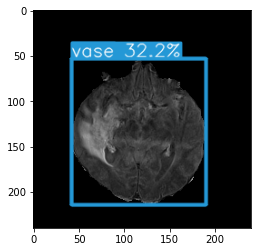

In [50]:
plot_bboxes(image, results[0].boxes.data, score=False)

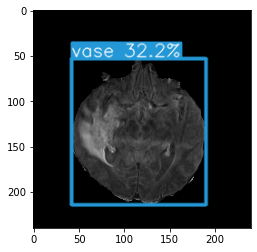

In [49]:

plot_bboxes(image, results[0].boxes.data, score=True, conf=0.3)

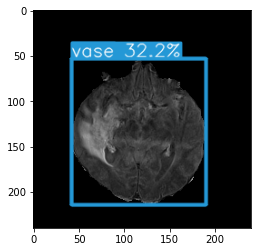

In [52]:

plot_bboxes(image, results[0].boxes.data, score=True, conf=0.7)

In [53]:
results[0].boxes.data

tensor([[ 42.3189,  53.6749, 190.3005, 214.5415,   0.3222,  75.0000]], device='cuda:0')

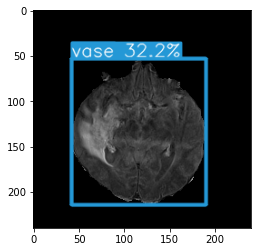

In [54]:

plt.imshow(image)
plt.show()

# Test de la segmentation

In [55]:
# Load a model for segmentation -seg
model = YOLO("yolov8n-seg.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model

# Predict with the model
results = model(data_img[0])  # predict on an image

100%|██████████| 6.73M/6.73M [00:00<00:00, 83.0MB/s]

0: 640x640 (no detections), 6.0ms
Speed: 3.5ms preprocess, 6.0ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)


In [56]:
print(results)

[ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: '

In [57]:
print(results[0].boxes.data)

tensor([], device='cuda:0', size=(0, 6))


In [111]:
#results = model.predict("https://ultralytics.com/images/bus.jpg")

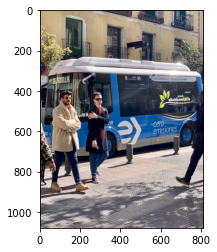

In [58]:
# if you want to get the original  image, use this way
response = requests.get("https://ultralytics.com/images/bus.jpg")
imageOr = Image.open(BytesIO(response.content))
image = np.asarray(imageOr)
#plot_bboxes(image, results[0].boxes.boxes, score=True, conf=0.7)
plot_bboxes(image, results[0].boxes.data, score=True)

In [113]:
#results[0].masks

seg0.png
seg1.png
seg2.png
seg3.png
seg4.png
seg5.png
AxesImage(size=(640, 480))


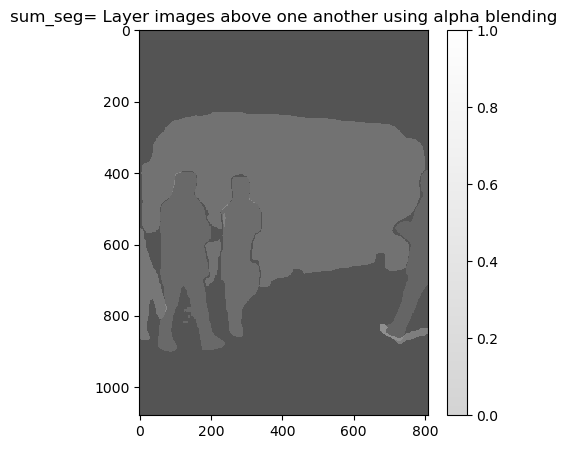

In [142]:
# seg: resulting segmented objects, one image by segmented objet. Size reduced compared to original one
seg = np.asarray(results[0].masks.masks)
sum_masks=seg[0] 
for i in range(1,6):
   #sum_masks=cv2.addWeighted(seg[i],0.5,sum_masks,0.5,0) 
    sum_masks=cv2.addWeighted(seg[i],1/2,sum_masks,1/2,0) 
plt.figure(figsize=(5,5))
for i in range (0,6):
    array=seg[i,:,:]
    #sum_seg=plt.imshow(array, cmap=plt.cm.gray,alpha=1/6, extent=(-0.5, width-1-0.5,  height-1-0.5,-0.5,),interpolation='nearest')
    sum_seg=plt.imshow(array, cmap=plt.cm.gray,alpha=1/6, extent=(-0.5, width-1-0.5,  height-1-0.5,-0.5,),interpolation='nearest')
    file='seg'+str(i)+'.png'
    cv2.imwrite(file,array)
    print('seg'+str(i)+'.png')
#sum_seg = cv2.cvtColor(sum_seg, cv2.COLOR_RGBA2GRAY)
#file='sum_seg.png'
plt.colorbar()
plt.title('sum_seg= Layer images above one another using alpha blending')
print(sum_seg)
#cv2.imwrite(file,sum_seg)

#plt.show()

   
    

True

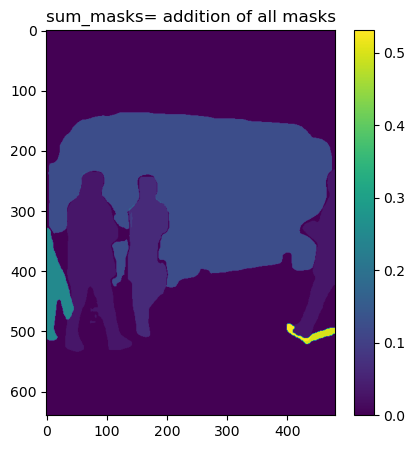

In [143]:
plt.figure(figsize=(5,5))
plt.imshow(sum_masks)
#plt.show()
plt.colorbar()
plt.title('sum_masks= addition of all masks')
file='sum_masks.png'
cv2.imwrite(file,array)


In [144]:
image = np.asarray(imageOr)
height_or, width_or, channels_or = image.shape 
print(height_or, width_or, channels_or)
height_new, width_new = sum_masks.shape 
print(height_new, width_new)

1080 810 3
640 480


In [145]:
response = requests.get("https://ultralytics.com/images/bus.jpg")
#response = requests.get(urls[5])
imageOr = Image.open(BytesIO(response.content))
image = np.asarray(imageOr)
height, width, channels = image.shape 
print(height, width, channels)
height_new, width_new = sum_masks.shape 
print(height_new, width_new)

1080 810 3
640 480


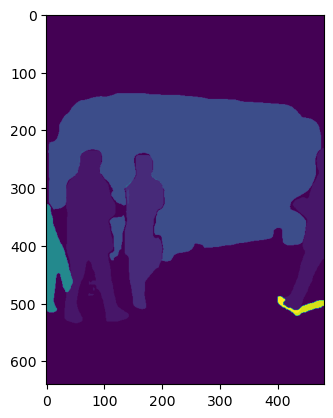

In [146]:
plt.imshow(sum_masks)
plt.show()

In [147]:
print(image.shape,sum_masks.shape)

(1080, 810, 3) (640, 480)


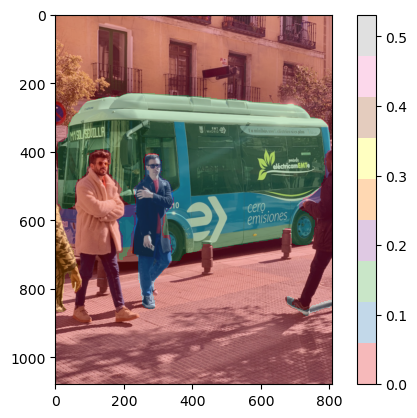

In [148]:
plt.imshow(image, cmap=plt.cm.cividis, alpha=1,interpolation='bilinear')
plt.imshow(sum_masks, cmap=plt.cm.Set1,alpha=.3, extent=(-0.5, width-1-0.5,  height-1-0.5,-0.5,),interpolation='nearest')
plt.colorbar()
#plt.show()

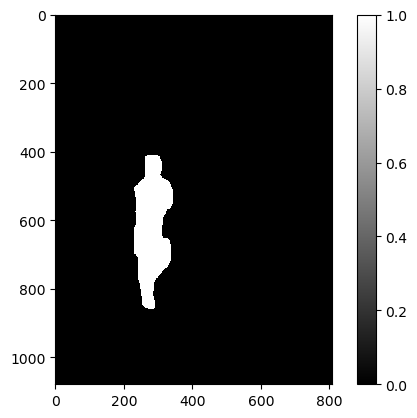

In [149]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap=plt.cm.gray, alpha=1,interpolation='bilinear')
seg = np.asarray(results[0].masks.masks)
height, width, channels = image.shape 
#for i in range(0,6):
i=2
plt.imshow(seg[i],cmap=plt.cm.gray,alpha=1, extent=(-0.5, width-1-0.5,  height-1-0.5,-0.5,),interpolation='nearest')
plt.colorbar()
plt.show()

In [150]:
print(image.shape)

(1080, 810, 3)


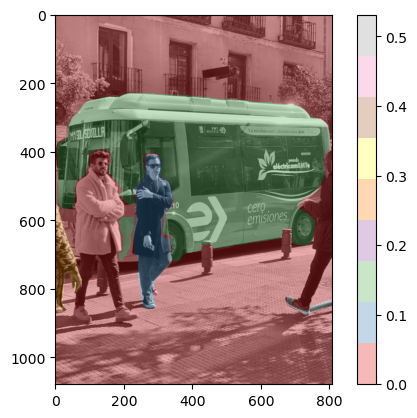

In [151]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap=plt.cm.gray, alpha=1,interpolation='bilinear')
#plt.imshow(nouvelle_image, cmap=plt.cm.Set1,alpha=.3, interpolation='nearest')
plt.imshow(sum_masks, cmap=plt.cm.Set1,alpha=.3,  extent=(-0.5, width-1-0.5,  height-1-0.5,-0.5,),interpolation='nearest')
plt.colorbar()
plt.show()


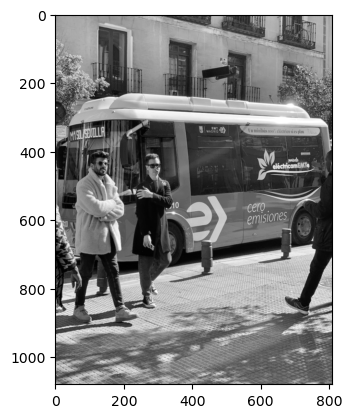

In [152]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap=plt.cm.gray, alpha=1,interpolation='bilinear')
plt.show()

In [153]:
#print(seg[0:639,0:479,:])
#print(seg[0:39,0:79,:])
#sum(seg[:,:,:]).shape
sum(seg).shape

(640, 480)

In [154]:
print(seg.shape)
print(seg)

(6, 640, 480)
[[[          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  ...
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]]

 [[          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  ...
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]
  [          0           0           0 ...           0           0           0]]

 [[       

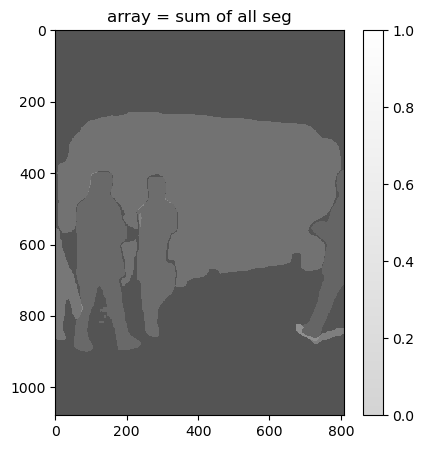

In [155]:
plt.figure(figsize=(5,5))    
for i in range (0,6):
    array=seg[i,:,:]
    sum(array)
    plt.imshow(array, cmap=plt.cm.gray,alpha=1/6, extent=(-0.5, width-1-0.5,  height-1-0.5,-0.5,),interpolation='nearest')
    file='seg'+str(i)+'.png'
    cv2.imwrite(file,array)
plt.title('array = sum of all seg')
#plt.show()
plt.colorbar()

In [156]:
array=seg[3,:,0:300]
sum(array)

array([          0,           0,           0,           0,           4,          96,         106,         107,         109,         111,         113,         114,         116,         118,         118,         118,         119,         120,         121,         123,         126,         129,         132,         145,
               147,         149,         149,         151,         152,         153,         154,         155,         155,         155,         152,         122,         119,         118,         117,         117,         117,         118,         119,         120,         121,         122,         122,         122,
               122,         123,         123,         122,         122,         122,         121,         117,         114,         112,         107,          95,          94,          92,          91,          91,          90,          89,          89,          89,          89,          88,          88,          89,
                88,          88,          8

In [157]:
  print('seg'+str(i)+'.png')
    

seg5.png
